I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `torch`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is always positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


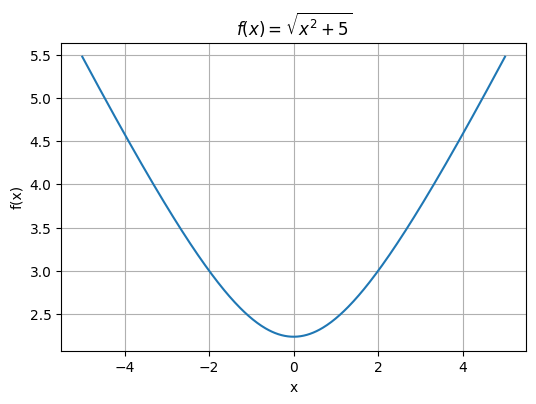

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x).
def f(x):
    return np.sqrt(x**2 + 5)

# Plot the function f(x), np.linspace might be helpful.
x_vals = np.linspace(-5, 5, 400)
y_vals = f(x_vals)

plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals)
plt.title(r"$f(x) = \sqrt{x^2 + 5}$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

Final iterate x_T: 0.0024265474506645762
f(x_T): 2.236069294125862


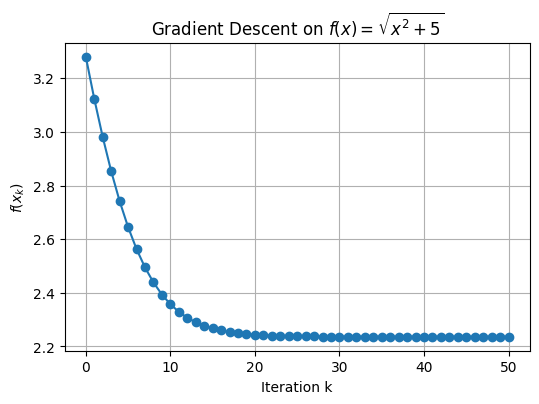

In [11]:
# Define the derivative of the function f(x), for gradient descent
def grad_f(x):
    # f(x) = sqrt(x^2 + 5)
    # f'(x) = x / sqrt(x^2 + 5)
    return x / np.sqrt(x**2 + 5)

# write a function to run the Gradient Descent Algorithm,
# takes initial_x, step_size, and num_iterations; returns array of x_k values.
def gradient_descent_1d(grad, initial_x, step_size, num_iterations):
    x_history = [initial_x]
    x = initial_x
    for k in range(num_iterations):
        x = x - step_size * grad(x)
        x_history.append(x)
    return np.array(x_history)

# set up/assign initial values
last_digit = 7
x0 = last_digit / 5.0 + 1.0

step_size = 0.3
num_iterations = 50

# Run gradient descent by calling the function
x_hist = gradient_descent_1d(grad_f, x0, step_size, num_iterations)

# report x_T by printing out the value
x_T = x_hist[-1]
print("Final iterate x_T:", x_T)
print("f(x_T):", f(x_T))

# Plot the f(x_k) values vs. iteration number
fx_hist = f(x_hist)
plt.figure(figsize=(6, 4))
plt.plot(range(len(fx_hist)), fx_hist, marker="o")
plt.title(r"Gradient Descent on $f(x) = \sqrt{x^2+5}$")
plt.xlabel("Iteration k")
plt.ylabel(r"$f(x_k)$")
plt.grid(True)
plt.show()

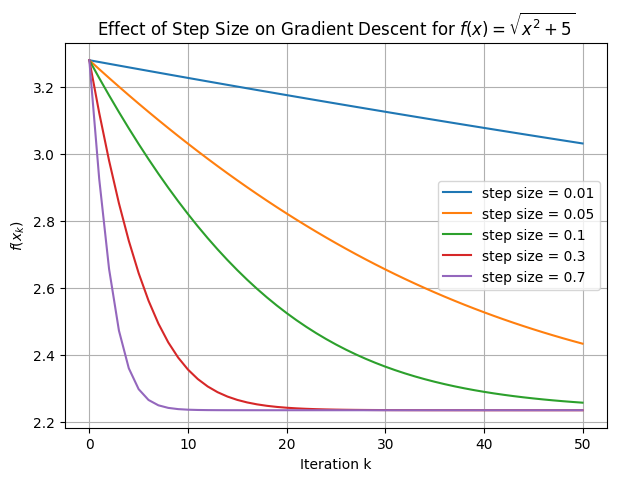

In [12]:
# create a list containing step sizes
step_sizes = [0.01, 0.05, 0.1, 0.3, 0.7]

# initialize a list to store the results from different step sizes
results = {}

# loop through the step sizes and perform GD and record results
num_iterations = 50
for alpha in step_sizes:
    x_hist_alpha = gradient_descent_1d(grad_f, x0, alpha, num_iterations)
    results[alpha] = x_hist_alpha

# plot multiple curves in a single graph: f(x_k) vs iteration
plt.figure(figsize=(7, 5))
for alpha, x_hist_alpha in results.items():
    fx_hist_alpha = f(x_hist_alpha)
    plt.plot(range(len(fx_hist_alpha)), fx_hist_alpha, label=f"step size = {alpha}")

plt.title(r"Effect of Step Size on Gradient Descent for $f(x) = \sqrt{x^2+5}$")
plt.xlabel("Iteration k")
plt.ylabel(r"$f(x_k)$")
plt.legend()
plt.grid(True)
plt.show()

## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



Intercept (b): 4.213999183114208
Coefficient for x1: 3.8423085962702697
Coefficient for x2: 0.41157825574881834


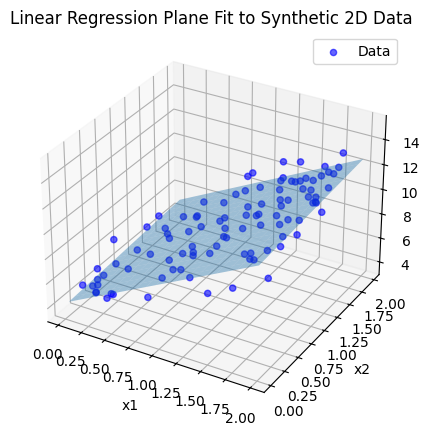

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to enable 3D projection

# ====================================================
# 1. Generate synthetic 2D data for linear regression
# ====================================================

# Set random seed for reproducibility
np.random.seed(27)

m = 100  # number of data points

# X has shape (100, 2): two features x1 and x2
X = 2 * np.random.rand(m, 2)

# True underlying linear model:
#   y = 4 + 4 * x1 + 0.5 * x2 + noise
noise = np.random.randn(m)
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + noise  # shape (100,)

# Add a column of ones for the bias term -> X_b shape: (100, 3)
X_b = np.c_[np.ones((m, 1)), X]

# ==============================================
# 2. Fit linear regression via the normal equation
# ==============================================

# θ = (X^T X)^{-1} X^T y
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Extract intercept and coefficients
intercept = theta_best[0]   # bias term b
coef_1 = theta_best[1]      # weight for x1
coef_2 = theta_best[2]      # weight for x2

print("Intercept (b):", intercept)
print("Coefficient for x1:", coef_1)
print("Coefficient for x2:", coef_2)

# ==============================================
# 3. Plot the data and the regression plane in 3D
# ==============================================

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o', alpha=0.6, label='Data')

# Create a grid of (x1, x2) values over the range of the data
x1_surf = np.linspace(X[:, 0].min(), X[:, 0].max(), 20)
x2_surf = np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
x1_grid, x2_grid = np.meshgrid(x1_surf, x2_surf)

# Compute predicted y values on the grid using the learned parameters
y_grid = intercept + coef_1 * x1_grid + coef_2 * x2_grid

# Plot the regression plane
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.4, edgecolor='none')

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.set_title("Linear Regression Plane Fit to Synthetic 2D Data")
ax.legend()
plt.show()

## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. Your task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

=== Hyperparameter tuning: learning rate vs final loss ===
  lr = 1.000: final loss after 200 epochs = 0.1895
  lr = 2.000: final loss after 200 epochs = 0.1434
  lr = 3.000: final loss after 200 epochs = 0.1225
  lr = 4.000: final loss after 200 epochs = 0.1098
  lr = 5.000: final loss after 200 epochs = 0.1010
  lr = 6.000: final loss after 200 epochs = 0.0944
  lr = 7.000: final loss after 200 epochs = 0.0892
  lr = 8.000: final loss after 200 epochs = 0.0849
  lr = 9.000: final loss after 200 epochs = 0.0812
  lr = 10.000: final loss after 200 epochs = 0.0781
  lr = 11.000: final loss after 200 epochs = 0.0754
  lr = 12.000: final loss after 200 epochs = 0.0729
  lr = 13.000: final loss after 200 epochs = 0.0704
  lr = 14.000: final loss after 200 epochs = 0.0683
  lr = 15.000: final loss after 200 epochs = 0.0664
  lr = 16.000: final loss after 200 epochs = 0.0647
  lr = 17.000: final loss after 200 epochs = 0.0630
  lr = 18.000: final loss after 200 epochs = 0.0615
  lr = 19.000:

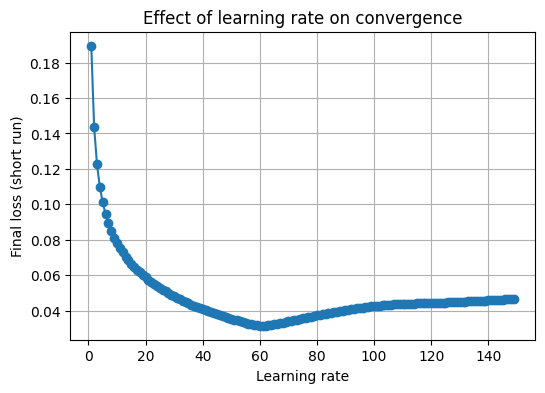


Selected learning rate (best on tuning run): lr = 61.000

Learned weights: [ 28.06041643 -49.07078072]
Learned bias: 20.484170750736276
Final training loss: 0.0314330141407979
Training accuracy: 98.75%
Test accuracy: 100.00%


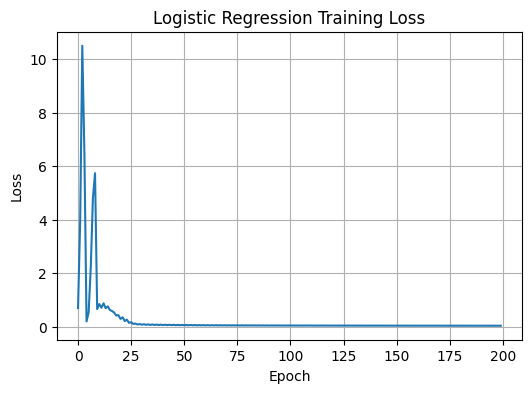

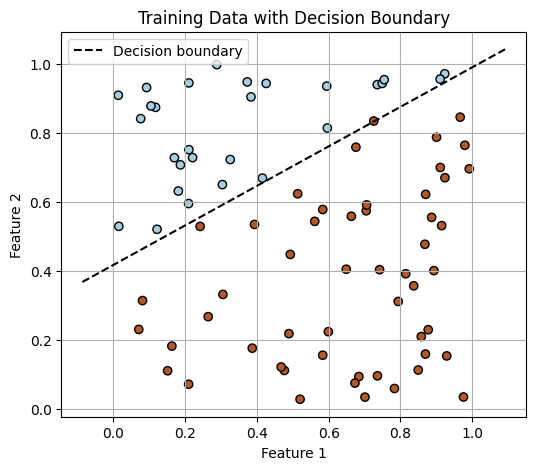

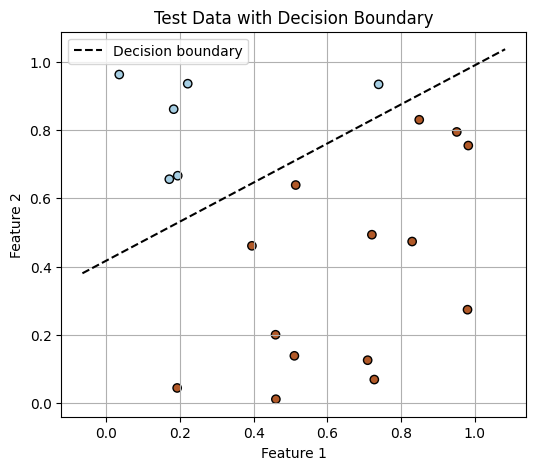

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# ==============================
# Define the logistic function
# ==============================

def sigmoid(z):
    """
    Logistic (sigmoid) function:
        sigma(z) = 1 / (1 + exp(-z)).
    Works on scalars or numpy arrays.
    """
    return 1.0 / (1.0 + np.exp(-z))


# ============================================
# Generate training and testing datasets
# ============================================

# Fix random seed so results are reproducible
np.random.seed(27)

# Generate 2D features: X has shape (2, 100)
# Each column of X is one point in R^2
X = np.random.rand(2, 100)

# "True" underlying parameters used to generate labels
w_true = np.array([1.5, -2.5])  # ground-truth weights
b_true = 1.0                    # ground-truth bias

# Compute probabilities from the true logistic model
# p_i = sigmoid(w_true^T x_i + b_true)
probs = sigmoid(w_true.T @ X + b_true)  # shape (100,)

# Generate binary labels y in {0,1} by thresholding at 0.5
Y = (probs > 0.5).astype(int)          # shape (100,)

# Split into training (first 80) and testing (last 20)
X_train, X_test = X[:, :80], X[:, 80:]
Y_train, Y_test = Y[:80], Y[80:]


# ============================================
# Set hyperparameters and initialize parameters
# ============================================

def compute_loss_and_gradients(w, b, X, Y):
    """
    Compute binary cross-entropy loss and its gradients
    with respect to w and b for logistic regression.

    Parameters
    ----------
    w : (2,) array
        Current weights.
    b : float
        Current bias.
    X : (2, m) array
        Input features (each column is a data point).
    Y : (m,) array
        Binary labels {0,1}.

    Returns
    -------
    loss : float
        Cross-entropy loss.
    dw : (2,) array
        Gradient of loss w.r.t. w.
    db : float
        Gradient of loss w.r.t. b.
    """
    m = X.shape[1]  # number of examples

    # Forward pass: compute predictions
    z = w @ X + b         # shape (m,)
    A = sigmoid(z)        # shape (m,)

    # Binary cross-entropy loss
    eps = 1e-8  # for numerical stability
    loss = -(1.0 / m) * np.sum(
        Y * np.log(A + eps) + (1 - Y) * np.log(1 - A + eps)
    )

    # Backward pass: gradients
    dz = A - Y                    # shape (m,)
    dw = (1.0 / m) * (dz @ X.T)   # shape (2,)
    db = (1.0 / m) * np.sum(dz)   # scalar

    return loss, dw, db


# ---- Hyperparameter tuning for learning rate ----
# I tried a range of learning rates and see which one
# gives the lowest loss after a small number of epochs.

max_lr = 150.0
lr_candidates = np.arange(1, max_lr, 1).tolist()
num_epochs_tune = 200
final_losses = []

print("=== Hyperparameter tuning: learning rate vs final loss ===")
for lr in lr_candidates:
    # start from the same initialization for each candidate
    w_tune = np.zeros(2)
    b_tune = 0.0
    loss_tune = None

    for epoch in range(num_epochs_tune):
        loss_tune, dw_tune, db_tune = compute_loss_and_gradients(
            w_tune, b_tune, X_train, Y_train
        )
        w_tune -= lr * dw_tune
        b_tune -= lr * db_tune

    final_losses.append(loss_tune)
    print(f"  lr = {lr:.3f}: final loss after {num_epochs_tune} epochs = {loss_tune:.4f}")

# Plot learning rate vs final loss (tuning curve)
plt.figure(figsize=(6,4))
plt.plot(lr_candidates, final_losses, marker="o")
plt.xlabel("Learning rate")
plt.ylabel("Final loss (short run)")
plt.title("Effect of learning rate on convergence")
plt.grid(True)
plt.show()

# choose the learning rate that achieved the lowest final loss
best_index = int(np.argmin(final_losses))
learning_rate = lr_candidates[best_index]
print(f"\nSelected learning rate (best on tuning run): lr = {learning_rate:.3f}\n")

# final number of epochs for the full training run
num_epochs = 200

# initialize parameters for the real training run
w = np.zeros(2)
b = 0.0
loss_history = []


# ==================
# Start training
# ==================

for epoch in range(num_epochs):
    loss, dw, db = compute_loss_and_gradients(w, b, X_train, Y_train)

    # gradient descent update
    w -= learning_rate * dw
    b -= learning_rate * db

    loss_history.append(loss)

# print learned parameters and final training loss
print("Learned weights:", w)
print("Learned bias:", b)
print("Final training loss:", loss_history[-1])


# ============================================
# Calculate training and testing accuracy
# ============================================

def predict(X, w, b):
    """
    Predict labels (0 or 1) for input X using parameters w, b.
    """
    probs = sigmoid(w @ X + b)
    return (probs >= 0.5).astype(int)

# predictions on training and testing sets
Y_train_pred = predict(X_train, w, b)
Y_test_pred = predict(X_test, w, b)

# accuracies
train_acc = (Y_train_pred == Y_train).mean()
test_acc = (Y_test_pred == Y_test).mean()

print(f"Training accuracy: {train_acc * 100:.2f}%")
print(f"Test accuracy: {test_acc * 100:.2f}%")


# ---- Plot loss vs epoch to show convergence ----
plt.figure(figsize=(6, 4))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Logistic Regression Training Loss")
plt.grid(True)
plt.show()


# =====================================================
# Plot the training dataset and regression decision boundary
# =====================================================

# 1) Training data with decision boundary
plt.figure(figsize=(6, 5))
plt.scatter(X_train[0, :], X_train[1, :],
            c=Y_train, cmap=plt.cm.Paired, edgecolors="k")
plt.title("Training Data with Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Decision boundary: w1 * x1 + w2 * x2 + b = 0
#  -> x2 = -(w1 * x1 + b) / w2
x1_min, x1_max = X_train[0, :].min() - 0.1, X_train[0, :].max() + 0.1
x1_vals = np.linspace(x1_min, x1_max, 200)

if abs(w[1]) > 1e-8:  # avoid division by zero
    x2_vals = -(w[0] * x1_vals + b) / w[1]
    plt.plot(x1_vals, x2_vals, "k--", label="Decision boundary")

plt.legend()
plt.grid(True)
plt.show()

# (Optional, but nice) Test data with the same decision boundary
plt.figure(figsize=(6, 5))
plt.scatter(X_test[0, :], X_test[1, :],
            c=Y_test, cmap=plt.cm.Paired, edgecolors="k")
plt.title("Test Data with Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

x1_min, x1_max = X_test[0, :].min() - 0.1, X_test[0, :].max() + 0.1
x1_vals = np.linspace(x1_min, x1_max, 200)

if abs(w[1]) > 1e-8:
    x2_vals = -(w[0] * x1_vals + b) / w[1]
    plt.plot(x1_vals, x2_vals, "k--", label="Decision boundary")

plt.legend()
plt.grid(True)
plt.show()


## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5

In [13]:
# Import necessary packages
import torch.nn as nn
import torch.optim 
from torch.utils.data import DataLoader, Dataset

import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [14]:
from torchvision import transforms, models

# Pipeline for preprocessing of the image. 
transform = transforms.Compose([

    # Convert a tensor or an ndarray to PIL Image
    # Original array is H x W x C
    # 3 channel, default mode is RGB
    transforms.ToPILImage(),

    # Resize into a fixed size same as ImageNet dataset
    transforms.Resize((224, 224)),

    # Flip the image horizontally using the default probability 0.5
    transforms.RandomHorizontalFlip(),

    # Transform to pytorch tensor
    transforms.ToTensor(),

    # Normalizes the pixel values using mean and std of the ImageNet dataset
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [17]:
# Load pretrained model. 
# ResNet from https://pytorch.org/vision/stable/models/generated/torchvision.models.resnet18.html#torchvision.models.resnet18
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 1)  # Binary classification (1 output)

In [ ]:
''' Set hyperparameters '''

# Use Binary Cross Entropy With Logits Loss for binary classification
criterion = nn.BCEWithLogitsLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
# Set scheduler to adjust learning rate during training
# StepLR reduce the learning rate by gamma after step_size of epoches
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=1e-6)

model = model.to(device)